In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.keys()

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df.shape

(6362620, 11)

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [12]:
df['nameOrig'].value_counts()

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
              ..
C1668034607    1
C992223106     1
C312737633     1
C1565612524    1
C1566511282    1
Name: count, Length: 6353307, dtype: int64

In [13]:
df['newbalanceOrig'].value_counts()

newbalanceOrig
0.00           3609566
18672.58             4
137.53               4
3420.22              4
15423.16             4
                ...   
1314660.84           1
35674547.89          1
25674547.89          1
15674547.89          1
230337.81            1
Name: count, Length: 2682586, dtype: int64

In [14]:
df['newbalanceOrig'].nunique() 

2682586

In [15]:
df['type'].nunique() 

5

In [16]:
df['nameOrig'].nunique() 

6353307

In [17]:
from sklearn import preprocessing

labelencoder = preprocessing.LabelEncoder()

df['type'] = labelencoder.fit_transform(df['type'])

In [18]:
df['type']

0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int64

In [19]:
df['type'].min(),df['type'].max()

(0, 4)

In [20]:
df['nameOrig']= labelencoder.fit_transform(df['nameOrig'])

In [21]:
df['nameOrig'].min(),df['nameOrig'].max()

(0, 6353306)

In [22]:
df['newbalanceOrig']= labelencoder.fit_transform(df['newbalanceOrig'])

In [23]:
df['newbalanceOrig'].min(),df['newbalanceOrig'].max()

(0, 2682585)

In [24]:
df['nameOrig']

0           757869
1          2188998
2          1002156
3          5828262
4          3445981
            ...   
6362615    5651847
6362616    1737278
6362617     533958
6362618    2252932
6362619     919229
Name: nameOrig, Length: 6362620, dtype: int64

In [25]:
df['newbalanceOrig']

0          1157557
1           336044
2                0
3                0
4           456430
            ...   
6362615          0
6362616          0
6362617          0
6362618          0
6362619          0
Name: newbalanceOrig, Length: 6362620, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  int64  
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 534.0+ MB


In [27]:
df['nameDest']= labelencoder.fit_transform(df['nameDest'])

In [28]:
df['nameDest'].min(),df['nameDest'].max()

(0, 2722361)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  int64  
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(4), int64(7)
memory usage: 534.0 MB


In [70]:
#smote technic

In [30]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  int64  
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(4), int64(7)
memory usage: 534.0 MB


In [32]:
from imblearn.over_sampling import SMOTE
import pandas as pd

In [33]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [34]:
import seaborn as sns

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

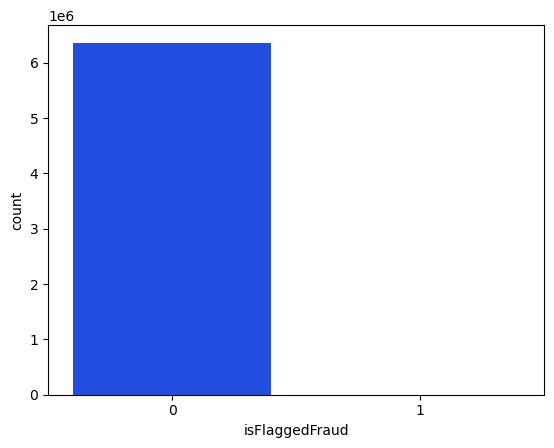

In [35]:
sns.countplot(x="isFlaggedFraud",data=df,palette="bright")

In [36]:
dfx=df.iloc[:,:-1]
dfy=df.iloc[:,-1]

In [37]:
sm=SMOTE()

trainx,trainy=sm.fit_resample(dfx,dfy)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  int64  
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(4), int64(7)
memory usage: 534.0 MB


In [55]:
trainy.value_counts()

isFlaggedFraud
0    6362604
1    6362604
Name: count, dtype: int64

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

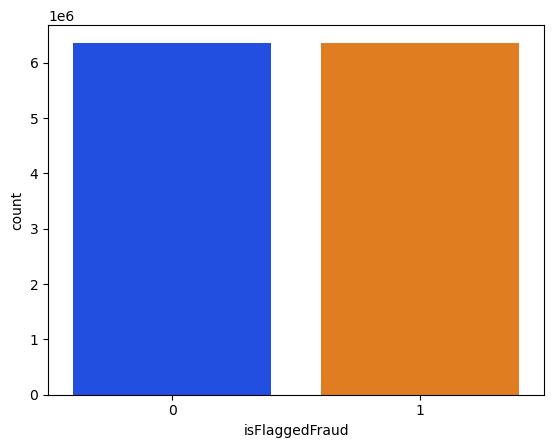

In [56]:
sns.countplot(x=trainy,palette="bright")

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.20,random_state=42)

In [73]:
print(trainx.shape)
print(trainy.shape)
print(x_test.shape)
print(y_test.shape)

(12725208, 10)
(12725208,)
(2545042, 10)
(2545042,)


In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtc.fit(trainx,trainy)

DecisionTreeClassifier()

In [76]:
pred=dtc.predict(x_test)
pred

array([1, 1, 0, ..., 1, 0, 0])

In [77]:
print(confusion_matrix(y_test,pred))

[[1272240       0]
 [      0 1272802]]


In [78]:
print(accuracy_score(y_test,pred))

1.0


In [79]:
#smote techniq krya pela ni acccuracy niche che

In [39]:
from scipy.stats import zscore

In [40]:
z=np.abs(zscore(df))
z

array([[1.70304158e+00, 9.52399323e-01, 2.81559923e-01, ...,
        3.33411405e-01, 3.59512005e-02, 1.58577857e-03],
       [1.70304158e+00, 9.52399323e-01, 2.94767262e-01, ...,
        3.33411405e-01, 3.59512005e-02, 1.58577857e-03],
       [1.70304158e+00, 1.69307616e+00, 2.97554804e-01, ...,
        3.33411405e-01, 2.78154828e+01, 1.58577857e-03],
       ...,
       [3.51012348e+00, 5.28954357e-01, 1.01539526e+01, ...,
        1.40302700e+00, 2.78154828e+01, 1.58577857e-03],
       [3.51012348e+00, 1.69307616e+00, 1.10976490e+00, ...,
        3.33411405e-01, 2.78154828e+01, 1.58577857e-03],
       [3.51012348e+00, 5.28954357e-01, 1.10976490e+00, ...,
        1.66981230e+00, 2.78154828e+01, 1.58577857e-03]])

In [41]:
dfn=df[(z<3).all(axis=1)]
dfn

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,1157557,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.00,336044,1733924,0.0,0.0,0,0
4,1,3,11668.14,3445981,41554.00,456430,828919,0.0,0.0,0,0
5,1,3,7817.71,6026525,53860.00,599444,2247218,0.0,0.0,0,0
6,1,3,7107.77,1805947,183195.00,1208464,2063363,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6295995,670,3,8868.80,2096973,11556.00,54805,1953514,0.0,0.0,0,0
6295996,670,3,7343.33,6003247,152.00,0,1784922,0.0,0.0,0,0
6295997,670,3,3282.37,1690625,5954.00,54514,1362068,0.0,0.0,0,0
6295998,670,3,4527.98,1270341,2671.63,0,1305682,0.0,0.0,0,0


In [42]:
print(df.shape)
print(dfn.shape)

(6362620, 11)
(6022026, 11)


In [43]:
x=dfn.iloc[:,:-1]
y=dfn.iloc[:,-1]
print(x.shape)
print(y.shape)

(6022026, 10)
(6022026,)


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4817620, 10)
(4817620,)
(1204406, 10)
(1204406,)


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtc = DecisionTreeClassifier()

In [47]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
pred=dtc.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
print(confusion_matrix(y_test,pred))

[[1204406]]


In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1204406

    accuracy                           1.00   1204406
   macro avg       1.00      1.00      1.00   1204406
weighted avg       1.00      1.00      1.00   1204406



In [51]:
print(accuracy_score(y_test,pred))

1.0
